<a href="https://colab.research.google.com/github/MJ199999/SW-Project/blob/master/code/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.8 MB/s 
     |████████████████████████████████| 120 kB 58.1 MB/s 
     |████████████████████████████████| 6.6 MB 46.7 MB/s 


# 2. Data Load & Simple Preprocess

In [ ]:
!wget https://github.com/MJ199999/SW-Project/raw/master/poem_key.xlsx

--2022-09-07 05:18:43--  https://github.com/MJ199999/SW-Project/raw/master/poem_key.xlsx
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MJ199999/SW-Project/master/poem_key.xlsx [following]
--2022-09-07 05:18:44--  https://raw.githubusercontent.com/MJ199999/SW-Project/master/poem_key.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163998 (160K) [application/octet-stream]
Saving to: ‘poem_key.xlsx’

poem_key.xlsx       100%[===================>] 160.15K  --.-KB/s    in 0.01s   

2022-09-07 05:18:44 (11.0 MB/s) - ‘poem_key.xlsx’ saved [163998/163998]



In [ ]:
import pandas as pd

df = pd.read_excel('/content/poem_key.xlsx')

In [ ]:
df.info()

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,시인,제목,시,키워드 전체,키워드1,키워드2,키워드3,키워드4,키워드5
0,강은교,우리가 물이 되어,우리가 물이 되어 만난다면\n가문 어느 집에선들 좋아하지 않으랴.\n우리가 키 큰 ...,"강물, 처녀, 나무, 가문, 기도",강물,처녀,나무,가문,기도
1,김춘수,꽃을 위한 서시,나는 시방 위험한 짐승이다.\n나의 손이 닿으면 너는 \n미지의 까마득한 어둠이 된...,"어둠, 신부, 울음, 짐승, 추억",어둠,신부,울음,짐승,추억
2,김춘수,꽃,내가 그의 이름을 불러 주기 전에는\n그는 다만\n하나의 몸짓에 지나지 않았다. \...,"향기, 무엇, 빛깔, 모두, 눈짓",향기,무엇,빛깔,모두,눈짓
3,김춘수,능금,그는 그리움에 산다.\n그리움은 익어서 \n스스로도 견디기 어려운\n빛깔이 되고 향...,"그리움, 축제, 충실, 향기, 바다",그리움,축제,충실,향기,바다
4,김춘수,부두에서,바다에 굽힌 사나이들\n하루의 노동을 끝낸\n저 사나이들의 억센 팔에 안긴\n깨지지...,"상어, 노동, 온전, 바다, 물개",상어,노동,온전,바다,물개


In [ ]:
train_dataset = df

# 3. Load Tokenizer & GPT3 Model

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("skt/ko-gpt-trinity-1.2B-v0.5", bos_token='</s>', eos_token='</s>', pad_token='<pad>')
gpt3_model = TFAutoModelForCausalLM.from_pretrained("skt/ko-gpt-trinity-1.2B-v0.5", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.15.attn.masked_bias', 'transformer.h.13.attn.masked_bias', 'transformer.h.19.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.22.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.18.attn.masked_bias', 'transformer.h.20.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.14.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'lm_head.weight', 'transformer.h.10.attn.masked_bias', 'transformer.h.12.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.21.attn.masked_bias', 'transformer.h.23.attn.masked_bias', 'transformer.h.17.attn.masked_bias', 'transformer.h.16.attn.masked_bias', 'transformer.h.8.attn.masked_bias']
-

In [ ]:
# gpt3_model = TFAutoModelForCausalLM.from_pretrained('/gdrive/MyDrive/Colab Notebooks/sw-project/SW-Project/skt-ko-gpt-trinity-1.2B-v0.5-3/')

In [ ]:
print(tokenizer.encode(df['시'].loc[0]))
print(tokenizer.tokenize(df['시'].loc[0]))
print(tokenizer.decode(tokenizer.encode(df['시'].loc[0])))

[31171, 36238, 30726, 33577, 30298, 376, 18792, 22688, 30696, 30198, 31634, 21068, 50647, 35706, 21788, 30005, 25624, 30417, 30697, 30397, 32051, 25512, 30279, 34310, 376, 25624, 42027, 30044, 42027, 30031, 31366, 42859, 51138, 30298, 30005, 376, 29880, 31570, 33401, 24196, 30121, 22692, 20160, 25404, 376, 25960, 32086, 31241, 37797, 30092, 34682, 39172, 376, 26213, 25768, 32051, 46222, 50272, 30312, 35673, 30005, 25260, 34551, 30865, 40981, 37254, 23272, 34509, 25628, 47102, 35306, 20476, 30298, 30005, 376, 36225, 19968, 30328, 31203, 376, 23280, 21956, 31082, 21900, 30589, 23028, 24784, 565, 24471, 25820, 30164, 35031, 34264, 376, 24224, 31517, 30093, 36902, 37556, 48481, 21076, 19016, 34179, 30005, 376, 22324, 30284, 40624, 41204, 43205, 25428, 376, 25960, 30093, 30288, 32767, 40659, 29880, 30688, 30134, 21956, 31082, 34257, 29152, 24644, 24644, 31793, 24644, 24644, 30093, 32198, 30248, 42859, 30023, 30441, 376, 25492, 31296, 40455, 29979, 27588, 376, 20091, 19016, 43308, 31891, 219

# 4. Tokenize Keywords & Poems

In [ ]:
max_seq_len = 180

In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):

    input_ids, data_labels = [], []
    
    for example, label in tqdm(zip(examples, labels), total=len(examples)):

        bos_token = [tokenizer.bos_token]
        eos_token = [tokenizer.eos_token]
        
        tokens = bos_token + tokenizer.tokenize(example) + eos_token
        input_id = tokenizer.convert_tokens_to_ids(tokens)
        input_id = pad_sequences([input_id], maxlen=180, value=tokenizer.pad_token_id, padding='post')[0]

        output_tokens = bos_token + tokenizer.tokenize(label) + eos_token
        output_id = tokenizer.convert_tokens_to_ids(output_tokens)
        output_id = pad_sequences([output_id], maxlen=max_seq_len, value=tokenizer.pad_token_id, padding='post')[0]
        
        assert len(input_id) == 180, "Error with inpxut length {} vs {}".format(len(input_id), max_seq_len)
        input_ids.append(input_id)
        data_labels.append(output_id)

    input_ids = np.array(input_ids, dtype=int)
    data_labels = np.array(data_labels, dtype=int)
    # data_labels = np.array(data_labels, dtype=int).reshape((-1,1))


    return input_ids, data_labels

# 5. Set Train Data

In [ ]:
train_X_1, train_y = convert_examples_to_features(train_dataset['키워드1'], train_dataset['시'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 328/328 [00:00<00:00, 1137.76it/s]


In [ ]:
train_X_2, train_y = convert_examples_to_features(train_dataset['키워드2'], train_dataset['시'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 328/328 [00:00<00:00, 1193.04it/s]


In [ ]:
train_X_3, train_y = convert_examples_to_features(train_dataset['키워드3'], train_dataset['시'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 328/328 [00:00<00:00, 1198.31it/s]


In [ ]:
train_X_4, train_y = convert_examples_to_features(train_dataset['키워드4'], train_dataset['시'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 328/328 [00:00<00:00, 1168.30it/s]


In [ ]:
train_X_5, train_y = convert_examples_to_features(train_dataset['키워드5'], train_dataset['시'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 328/328 [00:00<00:00, 1248.60it/s]


# 6. Freeze part of GPT3 Model

In [ ]:
gpt3_model.transformer.wte.trainable = False

In [ ]:
gpt3_model.transformer.h[0].trainable = False
gpt3_model.transformer.h[1].trainable = False
gpt3_model.transformer.h[2].trainable = False
gpt3_model.transformer.h[3].trainable = False
gpt3_model.transformer.h[4].trainable = False
gpt3_model.transformer.h[5].trainable = False
gpt3_model.transformer.h[6].trainable = False
gpt3_model.transformer.h[7].trainable = False
gpt3_model.transformer.h[8].trainable = False
gpt3_model.transformer.h[9].trainable = False
gpt3_model.transformer.h[10].trainable = False
gpt3_model.transformer.h[11].trainable = False
gpt3_model.transformer.h[12].trainable = False
gpt3_model.transformer.h[13].trainable = False
gpt3_model.transformer.h[14].trainable = False
gpt3_model.transformer.h[15].trainable = False
gpt3_model.transformer.h[16].trainable = False
gpt3_model.transformer.h[17].trainable = False
gpt3_model.transformer.h[18].trainable = False
gpt3_model.transformer.h[19].trainable = False
gpt3_model.transformer.h[20].trainable = False
gpt3_model.transformer.h[21].trainable = False
gpt3_model.transformer.h[22].trainable = False

In [ ]:
gpt3_model.summary()

Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 1162556160
 r)                                                              
                                                                 
Total params: 1,162,556,160
Trainable params: 46,231,680
Non-trainable params: 1,116,324,480
_________________________________________________________________


# 8. Memory Management

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import gc
gc.collect()

26678

# 7. Model Compile

In [ ]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adagrad(lr=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
gpt3_model.compile(optimizer=optimizer, loss=loss)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


# callbacks

In [ ]:
import matplotlib.pyplot as plt


from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

plot_losses = PlotLosses()

In [ ]:
def scheduler(epoch, lr):

  if epoch == 5:
    lr = lr*0.1
    print("learning rate changed at epcoh {} as {}".format(epoch, lr))
  return lr

from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(scheduler)

# 9. Train Model

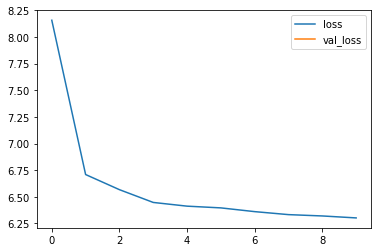

loss =  6.3022332191467285 , val_loss =  None
82/82 [==============================] - 54s 654ms/step - loss: 6.3022


In [ ]:
gpt3_model.fit(train_X_1, train_y, epochs=10, batch_size=4, callbacks=[plot_losses])

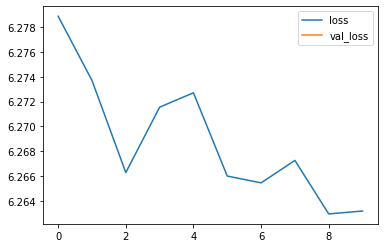

loss =  6.263184547424316 , val_loss =  None
82/82 [==============================] - 54s 654ms/step - loss: 6.2632 - lr: 1.0000e-03


In [ ]:
gpt3_model.fit(train_X_2, train_y, epochs=10, batch_size=4, callbacks=[plot_losses, lr_scheduler])

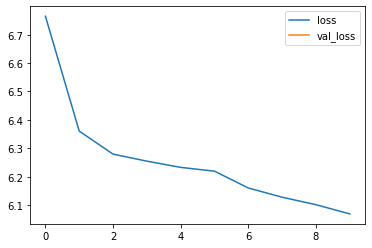

loss =  6.068994045257568 , val_loss =  None
82/82 [==============================] - 54s 654ms/step - loss: 6.0690


In [ ]:
gpt3_model.fit(train_X_3, train_y, epochs=10, batch_size=4, callbacks=[plot_losses])

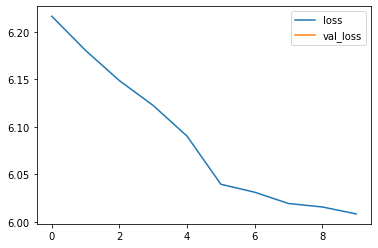

loss =  6.0083208084106445 , val_loss =  None
82/82 [==============================] - 54s 654ms/step - loss: 6.0083 - lr: 1.0000e-03


In [ ]:
gpt3_model.fit(train_X_4, train_y, epochs=10, batch_size=4, callbacks=[plot_losses, lr_scheduler])

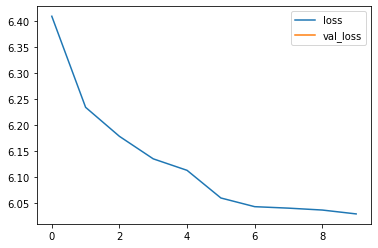

loss =  6.028957366943359 , val_loss =  None
82/82 [==============================] - 54s 655ms/step - loss: 6.0290 - lr: 1.0000e-03


In [ ]:
gpt3_model.fit(train_X_5, train_y, epochs=10, batch_size=4, callbacks=[plot_losses, lr_scheduler])

# 10. Tokenize Test Input

In [ ]:
max_key_len=180

In [ ]:
keyword = "가을"

bos_token = [tokenizer.bos_token]
eos_token = [tokenizer.eos_token]

tokens = bos_token + tokenizer.tokenize(keyword) + eos_token
input_id = tokenizer.convert_tokens_to_ids(tokens)
input_id = pad_sequences([input_id], maxlen=max_key_len, value=tokenizer.pad_token_id, padding='post')[0]

input_id = np.array(input_id, dtype=int).reshape((-1,1))

input_ids1 = tokenizer(keyword, return_tensors='pt').input_ids
#input_ids1.unsqueeze(0)

# 11. Generate Poem

In [ ]:
gen_id = gpt3_model.generate(input_id, do_sample=False, min_length = 5, max_length=180, pad_token_id=tokenizer.pad_token_id, eos_token_id=tokenizer.eos_token_id, bos_token_id=tokenizer.bos_token_id, repetition_penalty=3.0, top_k=50, top_p=0.92,temperature=0.9, no_repeat_ngram_size=2)
gen_text = tokenizer.batch_decode(gen_id, skip_special_tokens=True)

In [ ]:
gen_text

# 12. Model Save

In [ ]:
import os
model_name = "skt-ko-gpt-trinity-1.2B-v0.5-new-2"
save_path = os.path.join('/gdrive/MyDrive/Colab Notebooks/sw-project/SW-Project/', model_name)
os.makedirs(save_path)
gpt3_model.save_pretrained(save_path)